In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
tdr_file="Well_TDR.prn"
velo_file="Well_velo.prn"
wellname="Well"

In [32]:
#Load data to arrays
tvdsrd, twt = np.loadtxt(tdr_file, unpack=True)

In [33]:
#Calculate average velocity
vavg=np.zeros(len(tvdsrd))
for i in range(1,len(twt)):
    vavg[i] = tvdsrd[i] / (twt[i]/2000)
vavg[0]=vavg[1]

In [34]:
#Calculate interval Velocity
vint=np.zeros(len(twt))
for i in range (1, len(twt)):
    vint[i]=(tvdsrd[i]-tvdsrd[i-1])/((twt[i]-twt[i-1])/2000)
vint[0]=vint[1]

In [35]:
#Calculate RMS velocity
vrms=np.zeros(len(vint))
summ=np.zeros(len(vint))
dt=np.ones(len(vint))
vrms[0]=vint[1]
for i in range (1, len(vint)):
    dt[i]=((twt[i]-twt[i-1])/2000)
    summ[i]=summ[i-1] + dt[i]*vint[i]*vint[i]
    vrms[i]=np.sqrt(summ[i]/(twt[i]/2000))

In [36]:
#Export velocity data
hheader='TVDSRD,TWT,VAVG,VINT,VRMS'
np.savetxt(velo_file, np.transpose([tvdsrd, twt, vavg, vint, vrms]),fmt='%12.6g', header=hheader, comments='# ',newline='\n')

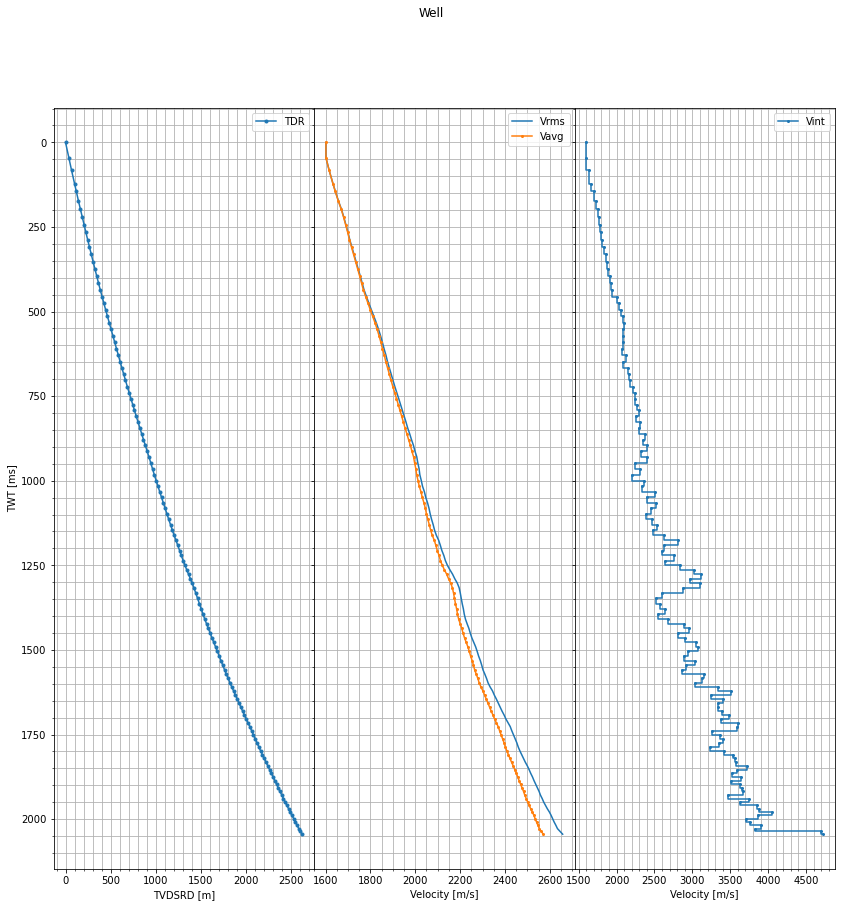

In [37]:
#Plot the data
fig, axs= plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(14,14))
fig.subplots_adjust(wspace=0)
axs[0].plot(tvdsrd, twt, label='TDR', marker='o', markersize=3)
axs[0].set(ylabel='TWT [ms]')
axs[0].set(xlabel='TVDSRD [m]')
axs[1].set(xlabel='Velocity [m/s]')
axs[2].set(xlabel='Velocity [m/s]')
axs[1].plot(vrms, twt, label='Vrms')
axs[1].plot(vavg, twt, label='Vavg', marker='o', markersize=2)
axs[2].step(vint, twt, label='Vint', marker='o', markersize=2)
for ax in axs:
    ax.invert_yaxis()
    ax.grid(True, which='both')
    ax.legend()
    ax.minorticks_on()
    plt.suptitle(wellname)
plt.show()